In [4]:
# ============================================================
# Lab Title: Data Visualization, Preprocessing, and Analysis
# ============================================================

# Step 1: Data Collection
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Load dataset
data = pd.read_csv("Brain Tumor.csv")

# Preview the first five rows
print("Preview of the dataset:\n")
display(data.head())


Preview of the dataset:



,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


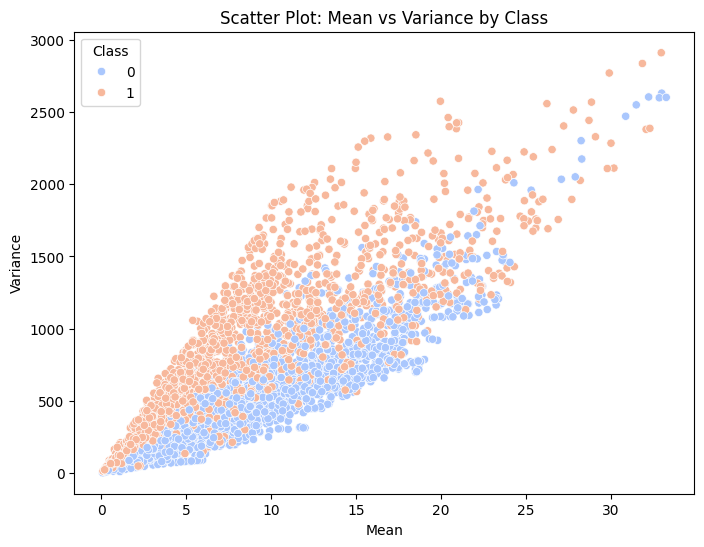

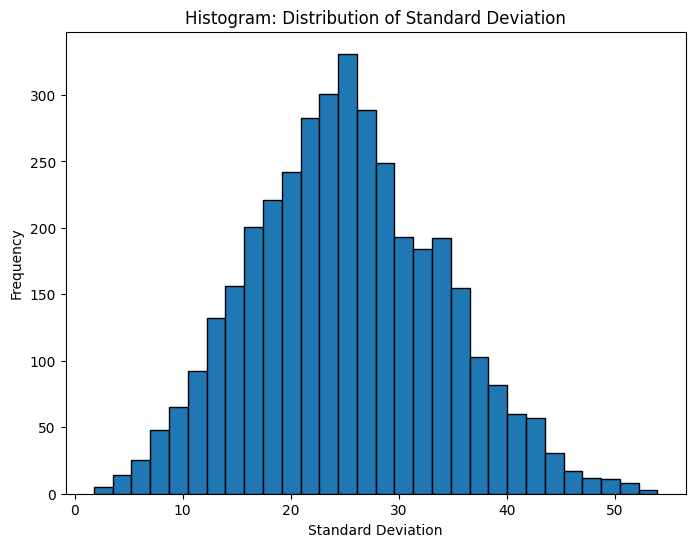

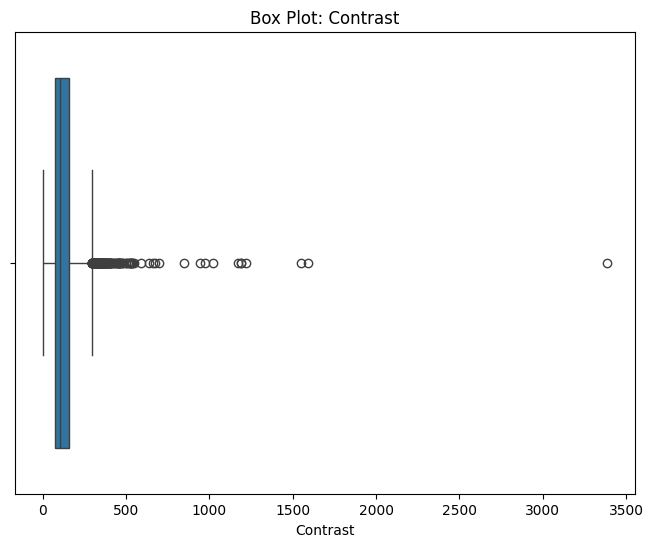

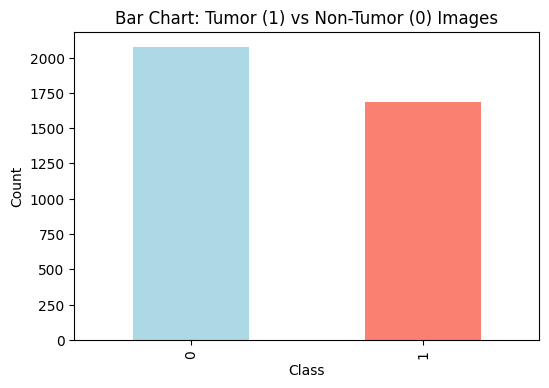

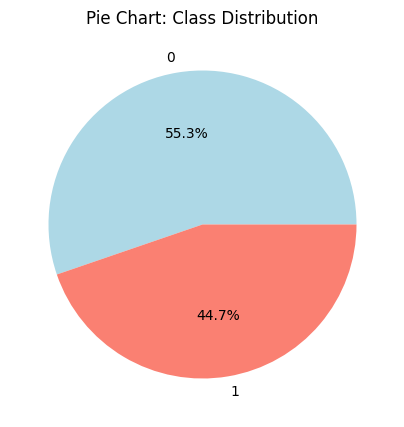

In [5]:
# ============================================================
# Step 2: Data Visualization
# ============================================================

# Scatter Plot – Relationship between Mean and Variance by Tumor Class
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='Mean', y='Variance', hue='Class', palette='coolwarm')
plt.title("Scatter Plot: Mean vs Variance by Class")
plt.xlabel("Mean")
plt.ylabel("Variance")
plt.show()

# Histogram – Distribution of Standard Deviation
plt.figure(figsize=(8, 6))
plt.hist(data['Standard Deviation'], bins=30, edgecolor='black')
plt.title("Histogram: Distribution of Standard Deviation")
plt.xlabel("Standard Deviation")
plt.ylabel("Frequency")
plt.show()

# Box Plot – Detect potential outliers in Contrast feature
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Contrast'])
plt.title("Box Plot: Contrast")
plt.show()

# Bar Chart – Tumor vs Non-Tumor Count
plt.figure(figsize=(6, 4))
data['Class'].value_counts().plot(kind='bar', color=['lightblue', 'salmon'])
plt.title("Bar Chart: Tumor (1) vs Non-Tumor (0) Images")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Pie Chart – Proportion of Tumor vs Non-Tumor
plt.figure(figsize=(5, 5))
data['Class'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightblue', 'salmon'])
plt.title("Pie Chart: Class Distribution")
plt.ylabel("")
plt.show()

In [6]:
# ============================================================
# Step 3: Data Preprocessing
# ============================================================

# 1. Handling Missing Values
print("Missing values before cleaning:\n", data.isnull().sum())

# (No missing values here, but if there were)
data_filled = data.fillna(data.mean(numeric_only=True))
print("\nMissing values after cleaning:\n", data_filled.isnull().sum())

# 2. Outlier Detection and Removal using IQR method
numeric_cols = data.select_dtypes(include=[np.number]).columns
Q1 = data[numeric_cols].quantile(0.25)
Q3 = data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

print("\nInterquartile Range (IQR):\n", IQR)

# Define outlier condition
outlier_condition = ((data[numeric_cols] < (Q1 - 1.5 * IQR)) | (data[numeric_cols] > (Q3 + 1.5 * IQR)))
outliers = data[outlier_condition.any(axis=1)]
print("\nNumber of detected outliers:", len(outliers))

# Remove outliers
data_no_outliers = data[~outlier_condition.any(axis=1)]
print("Dataset shape after outlier removal:", data_no_outliers.shape)

# 3. Data Reduction
# Example: Drop the 'Image' column (non-numeric identifier)
data_reduced = data_no_outliers.drop(columns=['Image'])
print("\nDataset after column reduction:\n")
display(data_reduced.head())

# Sampling: reduce dataset to 50% for demonstration
data_sampled = data_reduced.sample(frac=0.5, random_state=42)
print("Dataset shape after sampling:", data_sampled.shape)

# 4. Data Scaling (Min-Max and Z-Score)
scaler_minmax = MinMaxScaler()
scaler_zscore = StandardScaler()

# Min-Max Scaling
scaled_minmax = pd.DataFrame(scaler_minmax.fit_transform(data_sampled.drop(columns=['Class'])),
                             columns=data_sampled.drop(columns=['Class']).columns)
scaled_minmax['Class'] = data_sampled['Class'].values

print("\nData after Min-Max Scaling:\n")
display(scaled_minmax.head())

# Z-Score Standardization
scaled_z = pd.DataFrame(scaler_zscore.fit_transform(data_sampled.drop(columns=['Class'])),
                        columns=data_sampled.drop(columns=['Class']).columns)
scaled_z['Class'] = data_sampled['Class'].values

print("\nData after Z-Score Standardization:\n")
display(scaled_z.head())


Missing values before cleaning:
 Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

Missing values after cleaning:
 Image                 0
Class                 0
Mean                  0
Variance              0
Standard Deviation    0
Entropy               0
Skewness              0
Kurtosis              0
Contrast              0
Energy                0
ASM                   0
Homogeneity           0
Dissimilarity         0
Correlation           0
Coarseness            0
dtype: int64

Interquartile Range (IQR):
 Class                   1.000000
Mean                    8.230328
Variance              603.728860
Standard Deviation     12.037414
Entropy                 0.1

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
2,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155
5,0,7.524109,607.395258,24.645390,0.214086,3.729886,14.471736,105.077882,0.421587,0.177736,0.598169,4.193146,0.976485,7.458341e-155


Dataset shape after sampling: (1336, 14)

Data after Min-Max Scaling:



,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
0,0.406876,0.257650,0.470595,0.275413,0.126029,0.062385,0.224758,0.473190,0.249125,0.531738,0.372005,0.594668,0.0,0
1,0.902763,0.753090,0.857521,0.073646,0.122184,0.077391,0.431986,0.216316,0.063941,0.345021,0.546446,0.664709,0.0,1
2,0.559809,0.384977,0.591504,0.286682,0.081814,0.037529,0.275511,0.486382,0.261838,0.585793,0.364489,0.669738,0.0,0
3,0.296762,0.353482,0.563698,0.294950,0.335756,0.207470,0.432473,0.495623,0.270930,0.468997,0.510804,0.702577,0.0,0
4,0.209267,0.208889,0.416632,0.885001,0.371212,0.241580,0.208734,0.933830,0.878289,0.742844,0.285592,0.869841,0.0,0



Data after Z-Score Standardization:



,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness,Class
0,0.163378,-0.574683,-0.465277,-0.148067,-0.872955,-0.803398,-0.747823,0.084657,-0.188558,0.221178,-0.487037,-0.254822,-8.280422e-171,0
1,2.550235,1.680979,1.512745,-0.933371,-0.889890,-0.733699,0.303116,-0.839302,-0.922601,-0.683757,0.505358,0.109107,-8.280422e-171,1
2,0.899492,0.005016,0.152828,-0.104208,-1.067705,-0.918853,-0.490433,0.132109,-0.138166,0.483157,-0.529795,0.135239,-8.280422e-171,0
3,-0.366633,-0.138375,0.010679,-0.072029,0.050832,-0.129489,0.305589,0.165350,-0.102127,-0.082900,0.302589,0.305867,-8.280422e-171,0
4,-0.787774,-0.796687,-0.741144,2.224519,0.207008,0.028947,-0.829091,1.741552,2.305354,1.244316,-0.978639,1.174960,-8.280422e-171,0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155



Central Tendency Measures:

Minimum:
 Class                  0.000000e+00
Mean                   7.865906e-02
Variance               3.145628e+00
Standard Deviation     1.773592e+00
Entropy                8.815796e-04
Skewness               1.886014e+00
Kurtosis               3.942402e+00
Contrast               3.194733e+00
Energy                 2.473117e-02
ASM                    6.116308e-04
Homogeneity            1.054898e-01
Dissimilarity          6.811207e-01
Correlation            5.494262e-01
Coarseness            7.458341e-155
dtype: float64

Maximum:
 Class                  1.000000e+00
Mean                   3.323997e+01
Variance               2.910582e+03
Standard Deviation     5.394981e+01
Entropy                3.945386e-01
Skewness               3.693129e+01
Kurtosis               1.371640e+03
Contrast               3.382574e+03
Energy                 5.896818e-01
ASM                    3.477246e-01
Homogeneity            8.109208e-01
Dissimilarity          2.782775e+01

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
Class,1.000000,-0.095729,0.308818,0.285568,-0.778180,0.402644,0.239844,0.212643,-0.862413,-0.758255,-0.847529,0.556319,-0.108601,NaN
Mean,-0.095729,1.000000,0.783027,0.790984,-0.099729,-0.601593,-0.358163,-0.050974,-0.014863,-0.109393,0.095556,-0.113864,0.293693,NaN
Variance,0.308818,0.783027,1.000000,0.975699,-0.344432,-0.347399,-0.248312,0.135494,-0.335470,-0.341061,-0.290527,0.235487,0.288037,NaN
Standard Deviation,0.285568,0.790984,0.975699,1.000000,-0.345127,-0.425428,-0.329798,0.117981,-0.331103,-0.342530,-0.288801,0.224773,0.354161,NaN
Entropy,-0.778180,-0.099729,-0.344432,-0.345127,1.000000,-0.222222,-0.140125,-0.140769,0.971260,0.999213,0.852019,-0.502363,0.122080,NaN
Skewness,0.402644,-0.601593,-0.347399,-0.425428,-0.222222,1.000000,0.899713,0.349856,-0.295413,-0.209289,-0.470054,0.511931,-0.570919,NaN
Kurtosis,0.239844,-0.358163,-0.248312,-0.329798,-0.140125,0.899713,1.000000,0.296664,-0.172454,-0.133741,-0.307314,0.375939,-0.589211,NaN
Contrast,0.212643,-0.050974,0.135494,0.117981,-0.140769,0.349856,0.296664,1.000000,-0.130708,-0.139276,-0.270119,0.761497,-0.427443,NaN
Energy,-0.862413,-0.014863,-0.335470,-0.331103,0.971260,-0.295413,-0.172454,-0.130708,1.000000,0.961628,0.915988,-0.545774,0.123680,NaN
ASM,-0.758255,-0.109393,-0.341061,-0.342530,0.999213,-0.209289,-0.133741,-0.139276,0.961628,1.000000,0.837139,-0.491813,0.121054,NaN


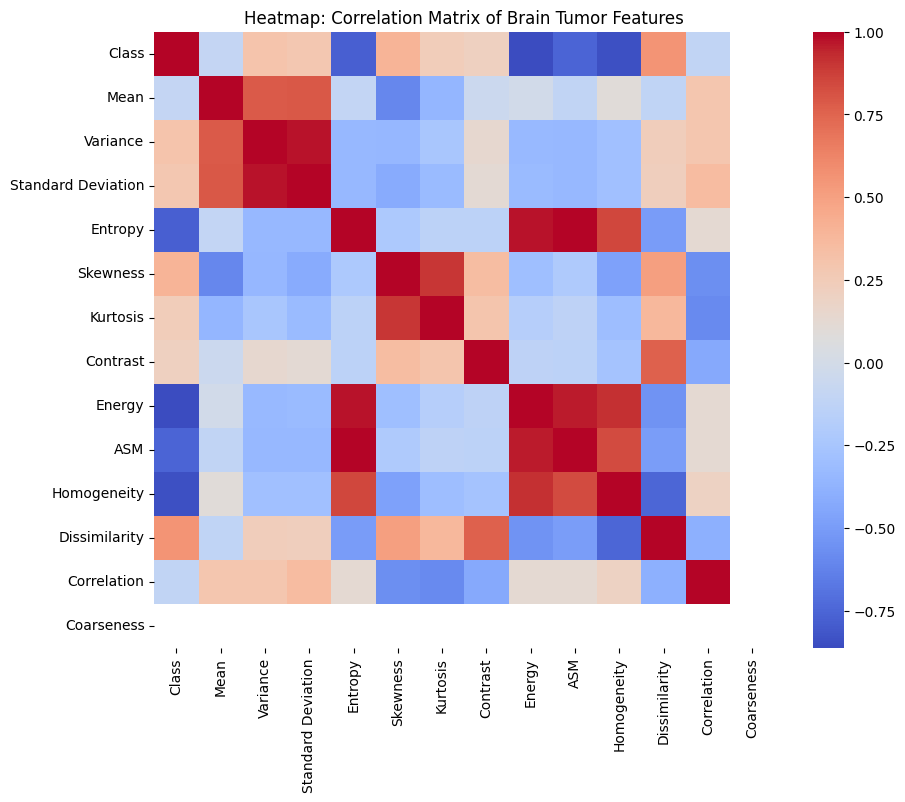

In [7]:
# ============================================================
# Step 4: Statistical Analysis
# ============================================================

# 1. General Overview
print("\nDataset Information:")
print(data.info())

print("\nDescriptive Statistics:\n")
display(data.describe())

# 2. Central Tendency Measures
min_values = data.min(numeric_only=True)
max_values = data.max(numeric_only=True)
mean_values = data.mean(numeric_only=True)
median_values = data.median(numeric_only=True)
mode_values = data.mode(numeric_only=True).iloc[0]

print("\nCentral Tendency Measures:\n")
print("Minimum:\n", min_values)
print("\nMaximum:\n", max_values)
print("\nMean:\n", mean_values)
print("\nMedian:\n", median_values)
print("\nMode:\n", mode_values)

# 3. Dispersion Measures
range_values = max_values - min_values
Q1 = data.quantile(0.25, numeric_only=True)
Q3 = data.quantile(0.75, numeric_only=True)
IQR = Q3 - Q1
variance = data.var(numeric_only=True)
std_dev = data.std(numeric_only=True)

print("\nDispersion Measures:\n")
print("Range:\n", range_values)
print("\nQuartiles:\nQ1:\n", Q1, "\nQ3:\n", Q3)
print("\nInterquartile Range (IQR):\n", IQR)
print("\nVariance:\n", variance)
print("\nStandard Deviation:\n", std_dev)

# 4. Correlation Analysis
corr_matrix = data.corr(numeric_only=True)
print("\nCorrelation Matrix:\n")
display(corr_matrix)

# Heatmap of correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=False)
plt.title("Heatmap: Correlation Matrix of Brain Tumor Features")
plt.show()